<center><h1>Recurrent Neural Networks</h1></center>

<center><img src="https://gblobscdn.gitbook.com/assets%2F-LvBP1svpACTB1R1x_U4%2F-LwEQnQw8wHRB6_2zYtG%2F-LwEZT8zd07mLDuaQZwy%2Fimage.png?alt=media&token=93a3c3e2-e32b-4fec-baf5-5e6b092920c4"></center>

The main idea behind recurrent neural networks is that the input is fed to them sequentially through time.




for example, the feed-forward neural network would work in the following way.

<div align="center">
  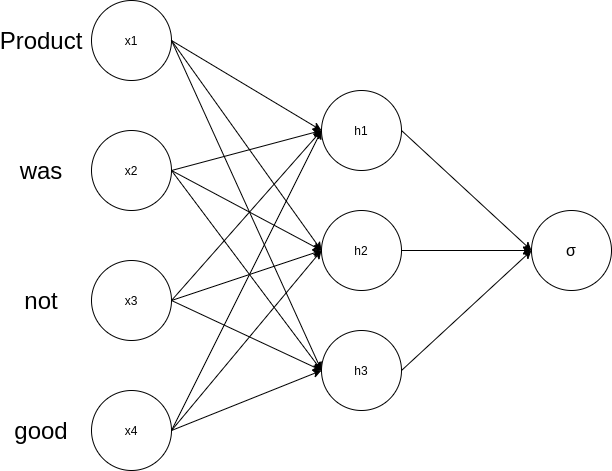
</div>
In the network above, each word is fed to an activation function, regardless of its order, The activation function has no clue what word has been seen before or after, as the output of the activation is calculated as

$$h1(x) = h1('product', 'was', 'not', 'good') = W_{1,1} * 'product' + W_{1,2} * 'was' + W_{1,3}*'not'+ W_{1,4}*'good' $$

And you can see here that if we changed the order of the tokens, nothing will change.

Now let's see how Recurrent networks does this:

<div align="center">
  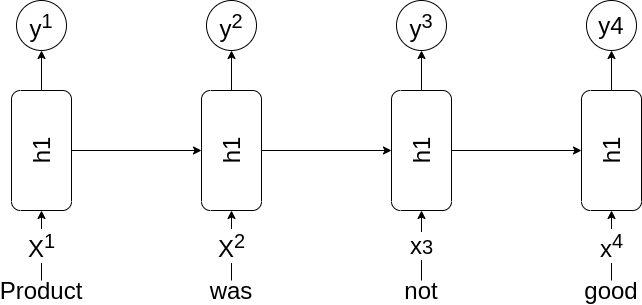
</div>



In the recurrent network, the input goes through the same hidden layer multiple times, updating its weights, and thus taking into account the order of the inputs because it updates itself based on the order of the input.

So the activation is calculated here in this example as follows


$$h1(x) = {\color{Red} h1('good', } {\color{Green} h1('not',} {\color{Blue} h1('was', } {\color{Yellow} h1('product', '<sos>')}{\color{Blue} )}{\color{Green} )}{\color{Red} )}$$


As you can see here each function takes as its input the previous function, which takes into account the previous input, and so on till the first input.

### Types of sequence problems

<center>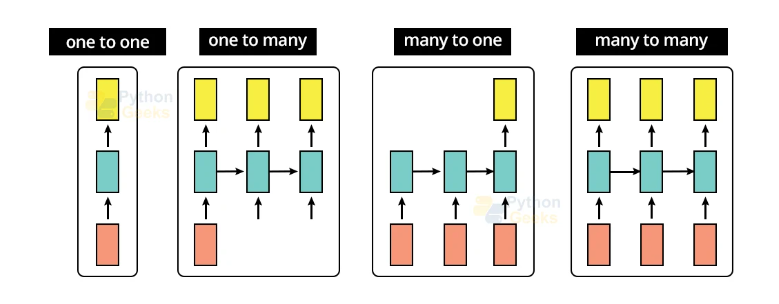</center>
<center></center>

The cases we might use sequence models might include for example:

1. One to Many
        a. song generator
        b. text generator
2. Many to One
        a. Sentiment Analysis
        b. Voice verification (like to tell if this is person X or not)
3. Many to Many (in the same time)
        a. Named Entities recognition
        b. Part of Speech tagging
4. Many to Many (encoder-decoder)
        a. Machine translation
        b. Question Answering
        
for one to one we don't need **sequence** model

### What happens inside the RNN block ??

<center><img src="https://miro.medium.com/max/1512/1*HRuDxU1i4JNu-Ywt88LnaQ.png"></center>
<center></center>

The cell by itself does one calculation, which is the hidden state $h_t$, in some cases the output of this cell is fed to a sigmoid or a softmax output and this would be another output called $a_t$ in the figure below

<div align="center">
  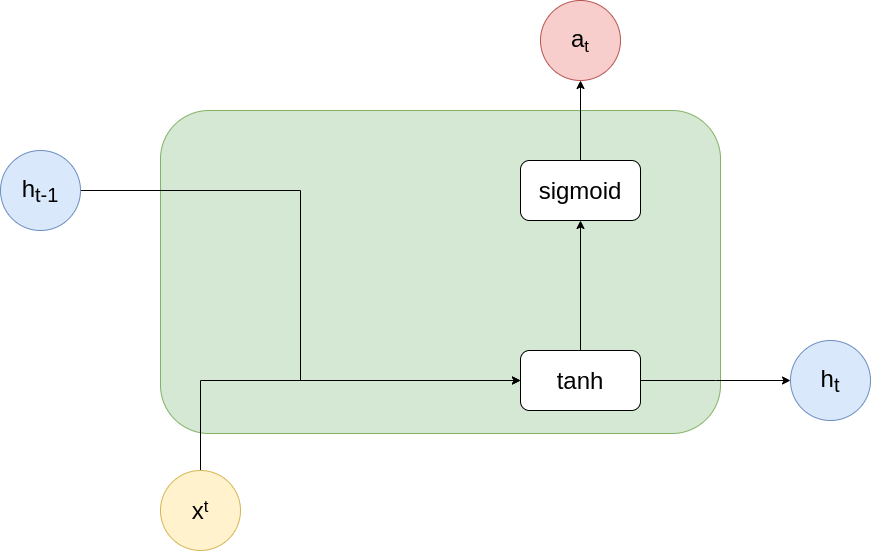
</div>

### Deal with RNN inputs

We need to pad all the inputs of the RNN so that they all have the same length or time so to speak, for example if one input is *'the product was very good with few problems'* would have **8** steps, for the next input let's say its: *'a good product'* this one have only **3** steps, so we pad it with 5 more tokens to make it in the same length as our longest sentence so it would be like so `'a good product <PAD> <PAD> <PAD> <PAD> <PAD>'`.

### Input representation

We represent our input in this case in embeddings, in the same way we discussed before, either character level or word or even sentence level.

Of course we can make use of a pre-trained model to generate these embeddings for us.

### Multi layer RNN ?

The RNN cell can be stacked up to build multilayer network, let's see how it will look.

<center><img src='https://static.packt-cdn.com/products/9781787121089/graphics/image_06_008.png'></center>

As you can see, each input passes through the first layer then the second layer, thus will enable the second layer to build a complex representation upon the first one's.

### Can we see the future ?

We solved the problem of input order, but can't we make use of the future inputs, because for example we might make use of the later text in our input to classify the current text.

## Bidirectional Recurrent Neural Network BiRNN

<center><img src='https://d2l.ai/_images/birnn.svg'></center>

The main idea of the bidirectional rnn is to capture both the inputs from the past and the future, note here that we can't drive the output of the network till all of the inputs were loaded, in another words, you can't get a many to many model in a way that on each input word you got a label.

## Building RNN with Tensorflow

<center><img src='https://www.lewuathe.com/assets/img/posts/2019-03-06-annoucements-in-tensorflow-dev-summit-2019/catch.png'></center>

### Embedding layer

The embedding layer is used to generate embeddings for tokens as they are fed to the network, remember what we did in the embedding step before?

In [ ]:
## Load the data to get started
import pandas as pd
import numpy as np
import tensorflow as tf
import spacy

In [ ]:
# Get the word-to-index mapping using the IMDB dataset
word2idx = tf.keras.datasets.imdb.get_word_index()

# Load the IMDB dataset, which consists of movie reviews
# The dataset is split into training and testing sets
# x_train: training data containing sequences of word indices
# y_train: training labels (0 for negative, 1 for positive)
# x_test: testing data containing sequences of word indices
# y_test: testing labels (0 for negative, 1 for positive)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data()


In [ ]:
# Access the first training example (x_train[0]) and retrieve the second word in the sequence (x_train[0][1]).
# The output value, 14, represents the index of the second word in the vocabulary.
x_train[0][1]

14

In [ ]:
# Create a dictionary called 'idx2word' using a dictionary comprehension.
# For each 'word' in the keys of the 'word2idx' dictionary, map the word's index (value in 'word2idx')
# to the actual word (the 'word' itself) and store it in 'idx2word'.
# This dictionary allows us to look up words by their corresponding indices.
idx2word = {word2idx[word]: word for word in word2idx.keys()}

In [ ]:
# Access the 'idx2word' dictionary to retrieve the word associated with the index 14.
idx2word[14]

'as'

In [ ]:
# Access the 'idx2word' dictionary to retrieve the word associated with the index 150.
idx2word[150]

'years'

In [ ]:
# Define a function called 'reconstruct' that takes a list of 'tokens' as input.
def reconstruct(tokens):
    # Initialize an empty list called 'text' to store the words corresponding to the input tokens.
    text = []

    # Iterate through each 'token' in the input 'tokens' list.
    for token in tokens:
        # Use the 'idx2word' dictionary to map the 'token' to its corresponding word and append it to the 'text' list.
        text.append(idx2word[token])

    # Join the words in the 'text' list with spaces to form a coherent text.
    # Return the reconstructed text as a single string.
    return " ".join(text)


In [ ]:
reconstruct(x_train[3])

"the of bernadette mon they halfway of identity went plot actors watch of share was well these can this only coe ten so failing feels only novak killer theo of bill br gretal would find of films saw grade about hated it for br so ten remain by in of songs are of sahib gigantic is morality it's her or know would care i i br screen that obvious plot actors new would with paris not have attempt lead or of too would local that of every their it coming this eleven of information to concocts br singers movie was anxious that film is under by left this troble is entertainment ok this in own be house of sticks worker in bound my i i obviously sake things just as lost lot br comes never like thing start of obviously comes indeed coming want no bad than history from lost comes accidentally young to movie bad facts dream from reason these honor movie elizabeth it's movie so fi implanted enough to computer duo film paraphrasing almost jeffrey rarely obviously snag alive to appears i i only human i

In [ ]:
y_train[3]

1

 In case we have multi-labeles
 We need to decode y as following

` y_train_encoded = tf.keras.utils.to_categorical(y_train)`

`y_test_encoded = tf.keras.utils.to_categorical(y_test) `

### Let' pad x_train to make sure they are all of the same length

In [ ]:
len(x_train[0]), len(x_train[1])

(218, 189)

In [ ]:
# Initialize a variable 'max_sequence_len' to keep track of the maximum sequence length.
max_sequence_len = 0

# Iterate through each 'sentence' in the 'x_train' dataset, which contains sequences of word indices.
for sentence in x_train:
    # Calculate the length of the current 'sentence,' which represents the number of tokens in it.
    # Compare it to the current maximum 'max_sequence_len' to find the longer sequence.
    max_sequence_len = max(len(sentence), max_sequence_len)

# Print the maximum sequence length found in the 'x_train' dataset.
print(max_sequence_len)


2494


Because this max length is too much, let's make it up to 100

In [ ]:
max_sequence_len = 100

Now let's padd all the sentences to have that max length

In [ ]:
# Create an array 'x_train_padded' filled with zeros, with dimensions (number of training examples, max_sequence_len).
x_train_padded = np.zeros((x_train.shape[0], max_sequence_len))

# Iterate through the training data 'x_train' and its indices.
for i, sent in enumerate(x_train):
    # For each training example, set the first 'len(sent)' elements in the corresponding row of 'x_train_padded'
    # to the values from 'sent,' effectively padding or truncating the sequence to match 'max_sequence_len.'
    x_train_padded[i, :len(sent)] = sent[:max_sequence_len]


In [ ]:
x_train_padded.shape

(25000, 100)

the same for x_test

In [ ]:
# Create an array 'x_test_padded' filled with zeros, with dimensions (number of testing examples, max_sequence_len).
x_test_padded = np.zeros((x_test.shape[0], max_sequence_len))

# Iterate through the testing data 'x_test' and its indices.
for i, sent in enumerate(x_test):
    # For each testing example, set the first 'len(sent)' elements in the corresponding row of 'x_test_padded'
    # to the values from 'sent,' effectively padding or truncating the sequence to match 'max_sequence_len.'
    x_test_padded[i, :len(sent)] = sent[:max_sequence_len]

# Display the shape of the resulting 'x_test_padded' array, which represents the dimensions after padding.
x_test_padded.shape


(25000, 100)

### Now let's build the model

In [ ]:
# check the vocabulary size
len(word2idx)

88584

In [ ]:
# Calculate the vocabulary size by finding the length (number of unique words) of the 'word2idx' dictionary.
VOCAB_SIZE = len(word2idx)
# The variable 'VOCAB_SIZE' now represents the total number of unique words in the vocabulary.
# 'word2idx' is a dictionary that contains unique words as keys and their corresponding indices as values.


In [ ]:
# Create a sequential model using Keras.
model = tf.keras.models.Sequential([
    # Add an embedding layer with input size 'VOCAB_SIZE' and embedding dimension 64.
    tf.keras.layers.Embedding(VOCAB_SIZE+1, 64),

    # Add a simple recurrent layer (SimpleRNN) with 64 units.
    tf.keras.layers.SimpleRNN(64),

    # Add a dense layer with 64 units and ReLU activation function.
    tf.keras.layers.Dense(64, activation='relu'),

    # Add the output layer with 1 unit and sigmoid activation (for binary classification).
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Compile the Keras model with the following settings:
# - Loss function: Binary Cross-Entropy, suitable for binary classification tasks.
# - Optimizer: Adam optimizer, a popular choice for gradient-based optimization.
# - Evaluation metric: Accuracy, which measures the model's performance in terms of correct predictions.
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),  # Binary Cross-Entropy loss for binary classification.
    optimizer=tf.keras.optimizers.Adam(),        # Adam optimizer for gradient-based optimization.
    metrics=['accuracy']                        # Use accuracy as an evaluation metric.
)


In [ ]:
# Train the Keras model with the following settings:
# - Training data: x_train_padded (padded sequences) and y_train (training labels).
# - Number of training epochs: 5, indicating how many times the model will see the entire training dataset.
# - Batch size: 128, the number of samples used in each gradient update.
# - Validation data: x_test_padded (padded sequences) and y_test (testing labels).
# - Validation steps: 30, the number of batches to validate before stopping the training for each epoch.
history = model.fit(
    x_train_padded,          # Training data (input sequences).
    y_train,                 # Training labels (output).
    epochs=5,                # Number of training epochs.
    batch_size=128,          # Batch size for mini-batch training.
    validation_data=(x_test_padded, y_test),  # Validation data for monitoring performance.
    validation_steps=30      # Number of validation steps per epoch.
)

Epoch 1/5
196/196 [==============================] - 28s 135ms/step - loss: 0.6935 - accuracy: 0.5076 - val_loss: 0.6908 - val_accuracy: 0.5266
Epoch 2/5
196/196 [==============================] - 26s 133ms/step - loss: 0.4869 - accuracy: 0.7762 - val_loss: 0.6112 - val_accuracy: 0.7010
Epoch 3/5
196/196 [==============================] - 26s 132ms/step - loss: 0.1406 - accuracy: 0.9496 - val_loss: 0.6478 - val_accuracy: 0.7659
Epoch 4/5
196/196 [==============================] - 26s 133ms/step - loss: 0.0467 - accuracy: 0.9858 - val_loss: 0.8982 - val_accuracy: 0.7242
Epoch 5/5
196/196 [==============================] - 26s 132ms/step - loss: 0.0298 - accuracy: 0.9914 - val_loss: 0.9269 - val_accuracy: 0.7518


In [ ]:
# Evaluate the model's performance on the test dataset.
test_loss, test_acc = model.evaluate(x_test_padded, y_test)

# Print the test loss, which indicates the model's prediction error on the test data.
print('Test Loss: {}'.format(test_loss))

# Print the test accuracy, which represents the model's accuracy in making correct predictions on the test data.
print('Test Accuracy: {}'.format(test_acc))


782/782 [==============================] - 7s 9ms/step - loss: 0.9270 - accuracy: 0.7455
Test Loss: 0.9269893169403076
Test Accuracy: 0.7454800009727478


### Can we make it work in both directions ?

In [ ]:
# Create a sequential model using Keras.
model_bi = tf.keras.models.Sequential([
    # Add an embedding layer with input size 'VOCAB_SIZE'+1 and embedding dimension 64.
    tf.keras.layers.Embedding(VOCAB_SIZE+1, 64),

    # Add a bidirectional SimpleRNN layer with 64 units and return sequences at each time step.
    # set the return sequences  to true because next RNN takes sequence
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, return_sequences=True)),

    # Add another bidirectional SimpleRNN layer with 64 units (no return sequences this time).
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64)),

    # Add a dense layer with 64 units and ReLU activation function.
    tf.keras.layers.Dense(64, activation='relu'),

    # Add the output layer with 1 unit and sigmoid activation (for binary classification).
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Compile the Keras model with the following settings:
# - Loss function: Binary Cross-Entropy, suitable for binary classification tasks.
# - Optimizer: Adam optimizer, a popular choice for gradient-based optimization.
# - Evaluation metric: Accuracy, which measures the model's performance in terms of correct predictions.
model_bi.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),  # Binary Cross-Entropy loss for binary classification.
    optimizer=tf.keras.optimizers.Adam(),        # Adam optimizer for gradient-based optimization.
    metrics=['accuracy']                        # Use accuracy as an evaluation metric.
)


In [ ]:
# Train the Keras bidirectional RNN model with the following settings:
# - Training data: x_train_padded (padded sequences) and y_train (training labels).
# - Number of training epochs: 5, indicating how many times the model will see the entire training dataset.
# - Batch size: 128, the number of samples used in each gradient update.
# - Validation data: x_test_padded (padded sequences) and y_test (testing labels).
# - Validation steps: 30, the number of batches to validate before stopping the training for each epoch.
history = model_bi.fit(
    x_train_padded,          # Training data (input sequences).
    y_train,                 # Training labels (output).
    epochs=5,                # Number of training epochs.
    batch_size=128,          # Batch size for mini-batch training.
    validation_data=(x_test_padded, y_test),  # Validation data for monitoring performance.
    validation_steps=30      # Number of validation steps per epoch.
)


Epoch 1/5
196/196 [==============================] - 60s 285ms/step - loss: 0.6851 - accuracy: 0.5458 - val_loss: 0.6909 - val_accuracy: 0.5891
Epoch 2/5
196/196 [==============================] - 54s 275ms/step - loss: 0.4054 - accuracy: 0.8211 - val_loss: 0.5086 - val_accuracy: 0.7940
Epoch 3/5
196/196 [==============================] - 58s 298ms/step - loss: 0.1028 - accuracy: 0.9632 - val_loss: 0.6970 - val_accuracy: 0.7406
Epoch 4/5
196/196 [==============================] - 54s 276ms/step - loss: 0.0267 - accuracy: 0.9918 - val_loss: 1.0402 - val_accuracy: 0.7068
Epoch 5/5
196/196 [==============================] - 54s 273ms/step - loss: 0.0118 - accuracy: 0.9965 - val_loss: 1.1296 - val_accuracy: 0.7737


In [ ]:
# Evaluate the performance of the trained bidirectional RNN model on the test dataset.
test_loss, test_acc = model_bi.evaluate(x_test_padded, y_test)

# Print the test loss, which indicates the model's prediction error on the test data.
print('Test Loss: {}'.format(test_loss))

# Print the test accuracy, which represents the model's accuracy in making correct predictions on the test data.
print('Test Accuracy: {}'.format(test_acc))


782/782 [==============================] - 22s 28ms/step - loss: 1.1823 - accuracy: 0.7662
Test Loss: 1.1822859048843384
Test Accuracy: 0.7662400007247925


### RNN drawbacks



* Vanishing and Exploding Gradients: RNNs are prone to the vanishing and exploding gradient problems during training. This occurs when gradients become either too small (vanishing) or too large (exploding) as they are backpropagated through time. It makes it difficult to train RNNs effectively over long sequences, and this can lead to poor convergence or divergence during training.

* Difficulty in Capturing Long-Term Dependencies: Standard RNNs struggle to capture long-term dependencies in sequences. They are more effective at modeling short-term dependencies but have limitations in remembering information from distant past time steps. This is where architectures like LSTMs and GRUs were introduced to address this issue.


## Gated Recurrent Unit (GRU)

The GRU cell replaces the Simple rnn cell, and adds a **gate** to the network, this gates allows the network to choose what to keep from the previous state, and thus can keep track of some memories, and also solves the vanishing gradient problem.


Without much math details, the gates here allows to forget certain points of the hidden states.

The simplified version of the equations are as follows

<div align="center">
  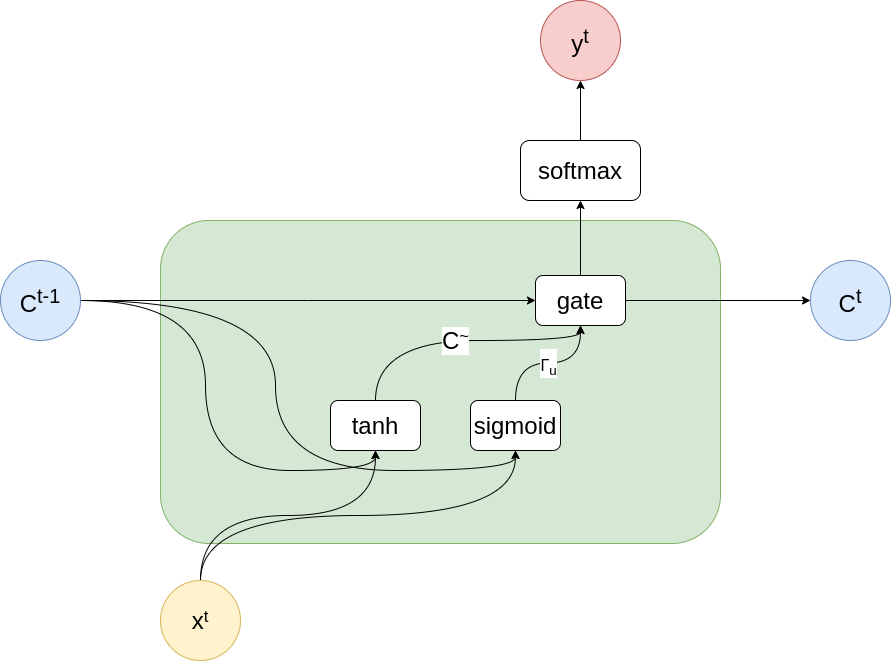
</div>

Here we say that $C^t = a^t = h^t$ meaning that that output state/hidden state are the same

The parameter $\tilde{C}$ is the candidate to replace vector, which will include the candidate hidden state

$$\tilde{C} = tanh(W_c [C^{t-1}, X^t] + b_c)$$

The gate $\Gamma_u$ is the gate that will tell which to forget of the last state and which to remember.

$$\Gamma_u = \sigma(W_u [C^{t-1}, X^t] + b_u)$$

The parameter $C^t$ includes the final output of the cell

$$C^t = \Gamma_u*\tilde{C} + (1-\Gamma_u)* C^{t-1}$$

So:

- if $\Gamma_u=0$ then $C^t = C^{t-1}$
- if $\Gamma_u=1$ then $C^t = \tilde{C}$

### Implementing GRU in Tensorflow

The implementation will be as simple as replacing one line of the code above

In [ ]:
# Create a sequential model using Keras.
gru_bi = tf.keras.models.Sequential([
    # Add an embedding layer with input size 'VOCAB_SIZE' and embedding dimension 64.
    tf.keras.layers.Embedding(VOCAB_SIZE+1, 64),

    # Add a bidirectional GRU layer with 64 units and return sequences at each time step.
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),

    # Add another bidirectional GRU layer with 64 units (no return sequences this time).
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),

    # Add a dense layer with 64 units and ReLU activation function.
    tf.keras.layers.Dense(64, activation='relu'),

    # Add the output layer with 1 unit and sigmoid activation (for binary classification).
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Compile the GRU model with specified loss function, optimizer, and metrics.
gru_bi.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),  # Use binary cross-entropy loss for binary classification.
    optimizer=tf.keras.optimizers.Adam(),  # Use the Adam optimizer for training.
    metrics=['accuracy']  # Track accuracy as one of the evaluation metrics.
)


In [ ]:
# Train the GRU model on the training data.
# - x_train_padded: Input training data with sequences padded to the same length.
# - y_train: Target labels for the training data.
# - epochs=5: Train the model for 5 epochs (5 complete passes through the training data).
# - batch_size=128: Update the model's weights after processing each batch of 128 samples.
# - validation_data=(x_test_padded, y_test): Use the validation data during training to monitor performance.
# - validation_steps=30: Perform validation on 30 batches of validation data.
history = gru_bi.fit(x_train_padded, y_train, epochs=5, batch_size=128,
                    validation_data=(x_test_padded, y_test),
                    validation_steps=30)


Epoch 1/5
196/196 [==============================] - 168s 793ms/step - loss: 0.5114 - accuracy: 0.7226 - val_loss: 0.4076 - val_accuracy: 0.8117
Epoch 2/5
196/196 [==============================] - 154s 786ms/step - loss: 0.2424 - accuracy: 0.9042 - val_loss: 0.5673 - val_accuracy: 0.7823
Epoch 3/5
196/196 [==============================] - 156s 798ms/step - loss: 0.1046 - accuracy: 0.9636 - val_loss: 0.6095 - val_accuracy: 0.7898
Epoch 4/5
196/196 [==============================] - 148s 754ms/step - loss: 0.0423 - accuracy: 0.9861 - val_loss: 0.8051 - val_accuracy: 0.7703
Epoch 5/5
196/196 [==============================] - 153s 781ms/step - loss: 0.0204 - accuracy: 0.9922 - val_loss: 1.1855 - val_accuracy: 0.7888


In [ ]:
# Evaluate the GRU model on the test data to assess its performance.
# - x_test_padded: Input test data with sequences padded to the same length.
# - y_test: Target labels for the test data.

# Use the `evaluate` method to compute the test loss and accuracy.
test_loss, test_acc = gru_bi.evaluate(x_test_padded, y_test)

# Print the test loss and test accuracy to assess the model's performance.
print('Test Loss: {}'.format(test_loss))  # Display the computed test loss.
print('Test Accuracy: {}'.format(test_acc))  # Display the computed test accuracy.


782/782 [==============================] - 43s 55ms/step - loss: 1.2207 - accuracy: 0.7838
Test Loss: 1.2206695079803467
Test Accuracy: 0.7837600111961365


### Long sequences

There is one more important architecture that we need to know , the LSTM

## Long Short Term Memory (LSTM)


The lstm offers a long term memory component beside the short term one, and thus enables the model to remember things that he have seen way far in the past, let's go through the idea of the LSTM.

<div align="center">
  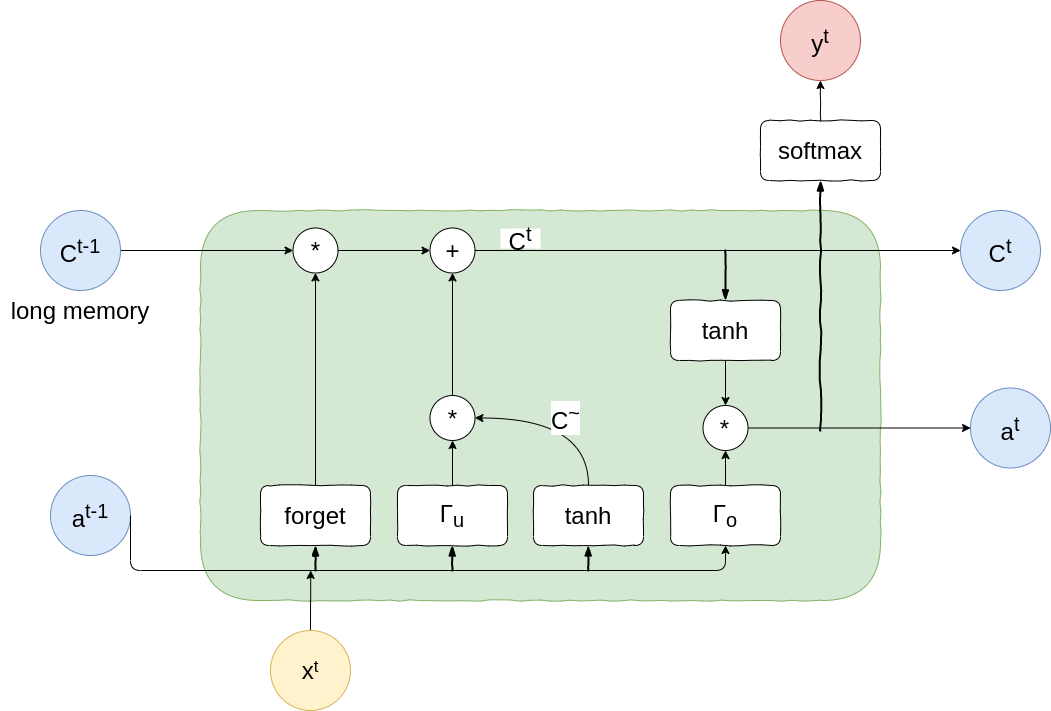
</div>

First the candidate new memory is calculated via the following equation

$$\tilde{C} = tanh(W_c [a^{t-1}, x^t] + b_c) $$

Here we simply take the last activation output (or the short term memory) and calculate what is the candidate of it to be remembered.

Then we have three gates here, update, forget and output, let's examine their equations.

> update gate
$$ \Gamma_u = \sigma(W_u [a^{t-1}, x^t] + b_u)$$

---

> forget gate
$$\Gamma_f = \sigma(W_f [a^{t-1}, x^t] + b_f)$$

---

> output gate
$$\Gamma_o = \sigma(W_o [a^{t-1}, x^t] + b_o)$$

---

So the three gates learn to remember, forget and update which parts of the hidden state, thus enable our model to work with relatively long sequences.

Now to the outputs of our cell

> the long term memory
$$C^t = \Gamma_u*\tilde{C} + \Gamma_f*C^{t-1}$$

So basically update these new values that i have just learned $\Gamma_u*\tilde{C}$ ,and keep from the last memory what the forget gate tells you $\Gamma_f*C^{t-1}$

> the short term memory
$$a^t = \Gamma_o*tanh(C^t)$$

just an activation function applied to the short memory learned in this step, and of course based only on the output of the $\Gamma_o$ gate.

> the output for this cell (aka prediction)
$$y^t = softmax(w_y.a^t + b_y)$$

And these together allows the LSTM to work with the large sequences without forgetting what was in the very first of the sentence, thus it can work with long sequences.

### Bidirectional LSTMs

<center>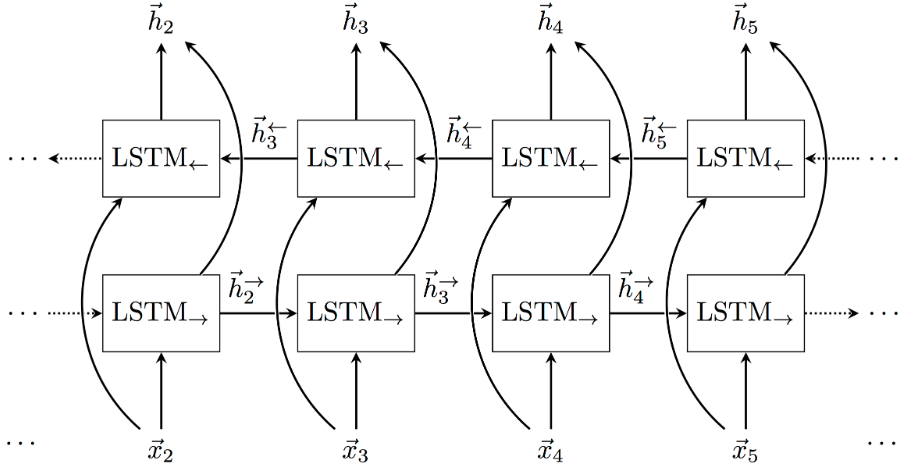</center>

The idea is the same as in RNN and GRU, the only difference is that we change the rnn block to LSTM block!

### Long sequence ?

Now we can let go the sequence length that we limited above !

In [ ]:
# Initialize a variable to keep track of the maximum sequence length.
max_sequence_len = 0

# Iterate through each sentence in the training data.
for sentence in x_train:
    # Calculate the length of the current sentence (number of tokens).
    sentence_length = len(sentence)

    # Update 'max_sequence_len' with the maximum length encountered so far.
    max_sequence_len = max(sentence_length, max_sequence_len)

# Print the maximum sequence length found in the training data.
print(max_sequence_len)


2494


In [ ]:
# Create an array 'x_train_padded' filled with zeros.
# Its shape is (number of training samples, maximum sequence length).
x_train_padded = np.zeros((x_train.shape[0], max_sequence_len))

# Iterate through each training sentence and pad them to the maximum sequence length.
for i, sent in enumerate(x_train):
    # Calculate the length of the current sentence.
    sentence_length = len(sent)

    # Copy the tokens from the original sentence to 'x_train_padded'.
    # This effectively pads or truncates the sequence to match 'max_sequence_len'.
    x_train_padded[i, :sentence_length] = sent[:max_sequence_len]


In [ ]:
x_train_padded.shape

(25000, 2494)

the same for x_test

In [ ]:
# Create an array of zeros with dimensions (number of samples in x_test, maximum sequence length)
x_test_padded = np.zeros((x_test.shape[0], max_sequence_len))

# Loop through each sentence in x_test and enumerate them
for i, sent in enumerate(x_test):
    # Copy the elements from each sentence to the corresponding row in x_test_padded,
    # but only up to the maximum sequence length
    x_test_padded[i, :len(sent)] = sent[:max_sequence_len]

# Check the shape of the resulting x_test_padded array
x_test_padded.shape


(25000, 2494)

In [ ]:
# Create a Sequential model using Keras
lstm_bi = tf.keras.models.Sequential([
    # Add an Embedding layer with VOCAB_SIZE vocabulary size and 64-dimensional embeddings
    tf.keras.layers.Embedding(VOCAB_SIZE, 64),

    # Add a Bidirectional LSTM layer with 64 units
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),

    # Add a Dense (fully connected) layer with 64 units and ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),

    # Add an output Dense layer with 1 unit and Sigmoid activation for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Compile the LSTM model with specified loss function, optimizer, and evaluation metrics
lstm_bi.compile(
    # Use Binary Cross-Entropy as the loss function for binary classification tasks
    loss=tf.keras.losses.BinaryCrossentropy(),

    # Use the Adam optimizer for gradient-based weight updates
    optimizer=tf.keras.optimizers.Adam(),

    # Define the evaluation metric(s) to monitor during training, in this case, accuracy
    metrics=['accuracy']
)


In [ ]:
# Fit the LSTM model to the training data
history = lstm_bi.fit(
    # Training input data (padded sequences)
    x_train_padded,

    # Training target data (labels)
    y_train,

    # Number of training epochs (iterations over the dataset)
    epochs=1,

    # Validation data to monitor the model's performance during training
    validation_data=(x_test_padded, y_test),

    # Number of validation steps per epoch (controls how many batches to use for validation)
    validation_steps=30
)


Epoch 1/5
196/196 [==============================] - 168s 793ms/step - loss: 0.5114 - accuracy: 0.7226 - val_loss: 0.4076 - val_accuracy: 0.8117
Epoch 2/5
196/196 [==============================] - 154s 786ms/step - loss: 0.2424 - accuracy: 0.9042 - val_loss: 0.5673 - val_accuracy: 0.7823
Epoch 3/5
196/196 [==============================] - 156s 798ms/step - loss: 0.1046 - accuracy: 0.9636 - val_loss: 0.6095 - val_accuracy: 0.7898
Epoch 4/5
196/196 [==============================] - 148s 754ms/step - loss: 0.0423 - accuracy: 0.9861 - val_loss: 0.8051 - val_accuracy: 0.7703
Epoch 5/5
196/196 [==============================] - 153s 781ms/step - loss: 0.0204 - accuracy: 0.9922 - val_loss: 1.1855 - val_accuracy: 0.7888


In [ ]:
# Evaluate the LSTM model on the test data
test_loss, test_acc = lstm_bi.evaluate(
    # Test input data (padded sequences)
    x_test_padded,

    # Test target data (labels)
    y_test
)

# Print the test loss
print('Test Loss: {}'.format(test_loss))

# Print the test accuracy
print('Test Accuracy: {}'.format(test_acc))


Test Loss: 1.2206695079803467
Test Accuracy: 0.7837600111961365


In [ ]:
# let's just save our models
# save the rnn
model.save('models/rnn')
# save the rnn_bi
model_bi.save('models/rnn_bi')
# save the gru_bi
gru_bi.save('models/gru_bi')
# save the lstm model
#lstm_bi.save('models/lstm_bi')

### How can we predict an input given these models ?

In [ ]:
# Define padding values for different model architectures
rnn_padding = 100
lstm_padding = 2494

# Load the IMDb word-to-index mapping
word2idx = tf.keras.datasets.imdb.get_word_index()

# Load pre-trained RNN, Bidirectional RNN (RNN with both forward and backward layers),
# Bidirectional GRU (Gated Recurrent Unit), and Bidirectional LSTM (Long Short-Term Memory) models
rnn = tf.keras.models.load_model('models/rnn')       # Load the RNN model
rnn_bi = tf.keras.models.load_model('models/rnn_bi')   # Load the Bidirectional RNN model
gru_bi = tf.keras.models.load_model('models/gru_bi')   # Load the Bidirectional GRU model
#lstm_bi = tf.keras.models.load_model('models/lstm_bi') # Load the Bidirectional LSTM model

In [ ]:
def predict(text, clf, word2idx, padding_size):
    # Create an array for padded text with zeros
    padded_text = np.zeros((padding_size))

    # Transform the input text into indices using the word-to-index mapping
    # and pad or truncate it to fit the specified padding size
    padded_text[:min(padding_size, len(text.split()))] = [
        word2idx.get(word, 0) for word in text.split()][:padding_size]

    # Predict the sentiment of the padded text using the provided classifier (clf)
    # by converting the padded_text into a tensor and expanding its dimensions
    prediction = clf.predict(tf.expand_dims(padded_text, 0))

    return prediction


In [ ]:
# Sample input text for sentiment prediction
text = "the movie was super awesome! " \
       "although i didn't like the fact that this piece of shit called star lord destroyed the " \
       "whole mission, i wish they don't include him in the upcoming movies really."


In [ ]:
# Call the predict function to predict the sentiment of the input text using a pre-trained RNN model
# (rnn), word-to-index mapping (word2idx), and a specified padding size (rnn_padding)
predict(text, rnn, word2idx, rnn_padding)


1/1 [==============================] - 0s 228ms/step


array([[0.9814397]], dtype=float32)

In [ ]:
# Call the predict function to predict the sentiment of the input text using a pre-trained bidirectional RNN model

predict(text, rnn_bi, word2idx, rnn_padding)

1/1 [==============================] - 0s 482ms/step


array([[0.8986982]], dtype=float32)

In [ ]:
# Call the predict function to predict the sentiment of the input text using a pre-trained bidirectional GRU model

predict(text, gru_bi, word2idx, rnn_padding)

1/1 [==============================] - 1s 1s/step


array([[0.08737625]], dtype=float32)

In [ ]:
# Call the predict function to predict the sentiment of the input text using a pre-trained bidirectional LSTM model

predict(text, lstm_bi, word2idx, lstm_padding)

1/1 [==============================] - 1s 1s/step


array([[0.50789464]], dtype=float32)

## Conclusion


In this notebook, we've provided an overview of recurrent neural networks (RNNs), delving into their functionality and their role in handling sequential data.

We've observed that RNNs excel in processing sequences due to their ability to capture the inherent patterns within a sequence, distinguishing them from feedforward networks.

Furthermore, we've explored the advantages of using Gated Recurrent Units (GRUs) over traditional RNNs, highlighting their superior memory management and effectiveness in mitigating the vanishing gradient problem.

Lastly, we've introduced Long Short-Term Memory (LSTM) networks, which introduce additional gates to enhance their understanding of sequences. This, in turn, allows LSTMs to maintain both short-term and long-term memory, making them well-suited for processing lengthy sequences.